In [1]:
import SamplingMoireMethod

import cv2
import sys
import numpy as np

In [4]:
# ---------------------------
allplotTF = 1 # 全プロット表示・非表示
# camera_id = "TestImage/IMG_2779.jpg" # カメラID or ファイル名
camera_id = "http://192.168.0.4:8080/video"
rotateTF = 0 # 画像回転？
# ---------------------------

In [13]:
def LiveCamera(camera_id, rotateTF):
    delay = 1
    window_name = 'frame (quit: q)'
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        sys.exit()
    while True:
        ret, img = cap.read()
        # リアルタイムで画像処理（ここに書く）
        if rotateTF:
            # 時計回りに回転
            img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        # 白黒
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # 単純二値化
    #     ret, img_binary = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
    #     ret, img_binary = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
        # 直線
        img = cv2.line(img, (int(img.shape[1]/2), 0), (int(img.shape[1]/2), int(img.shape[0])),
                       (2**8, 0, 0), thickness=1, lineType=cv2.LINE_AA)
        img = cv2.line(img, (0, int(img.shape[0]/2)), (int(img.shape[1]), int(img.shape[0]/2)),
                       (2**8, 0, 0), thickness=1, lineType=cv2.LINE_AA)
        cv2.imshow(window_name, img)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    cv2.destroyWindow(window_name)
    cap.release()

LiveCamera(camera_id, rotateTF)

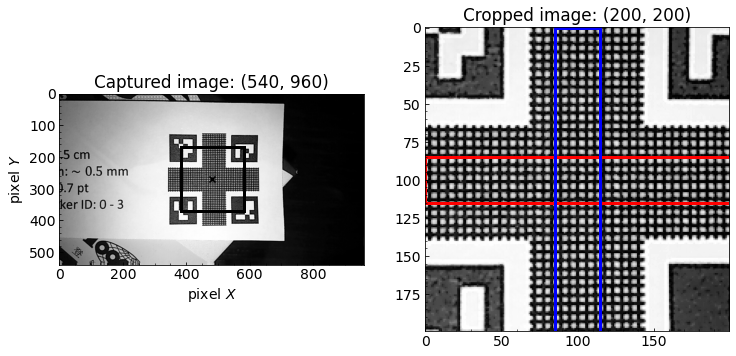

In [17]:
# ---------------------------
centerX, centerY = 482, 269  # サンプリングのセンターピクセル指定
lengthX = 201
lengthY = lengthX
linewidth = 30
GaussConst = 55 # 平滑化のための定数（奇数）
# ---------------------------
im_gray = SamplingMoireMethod.CapturedImage(camera_id, rotateTF, 0)
(im_Htrim, im_Vtrim) = SamplingMoireMethod.ImageHVTrim(
    im_gray, (centerX, centerY), (lengthX, lengthY), linewidth, GaussConst, 1)

In [18]:
# サンプリングピッチの推定
try: 
    ((unmove_phi_H,unmove_phi_V),SamplingPitch) = SamplingMoireMethod.ImageToPhase(
        camera_id, rotateTF, (centerX, centerY), (lengthX, lengthY),
    linewidth, GaussConst, (0,0), 0)
    print("Sampling pitch (H,V): ", SamplingPitch)
except ValueError:
    print("推定に失敗．手動で指定してください．")

Lineprofile = np.mean(im_Vtrim, axis=0)
import matplotlib.pyplot as plt

from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.plotting import figure 
output_notebook()
source = ColumnDataSource(data={
    'x' : range(len(Lineprofile)),
    'y' : Lineprofile,
})
p = figure(plot_width=600, 
           plot_height=200, 
           tooltips="X軸：@x / Y軸：@y")     # ツールチップに表示させる情報
p.circle('x','y',source=source) 
p.line('x','y',source=source)  
show(p)

# (im_Htrim, im_Vtrim) = SamplingMoireMethod.ImageHVTrim(
#     im_gray, (centerX, centerY), (lengthX, lengthY), linewidth, GaussConst, 0)
# SamplingMoireMethod.ShowInterpolationProcess(im_Htrim)

推定に失敗．手動で指定してください．


Loading BokehJS ...

In [19]:
(148-96)/9

5.777777777777778